# Support Vector Machines using data from Phising Websites Data Set

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from svmutil import *
import matplotlib.pyplot as plt
from time import time

Import pandas, when reading the csv sometimes we dont have any headers, if we choose the option header=None, now we have a 0:len scale for the columns.

In [3]:
df = pd.read_csv("hw2_question3.csv", header=None)

This next function will reorder the data fram by inserting three new columns on a specific list of columns and it will delete the old data frame column.

In [4]:
def reorder(df, index):
    df[str(index)+"a"] = (df[index] < 0).astype(int)
    df[str(index)+"b"] = (df[index] == 0).astype(int)
    df[str(index)+"c"] = (df[index] > 0).astype(int)
    del df[index]

In [5]:
triplets = [1,6,7,13,14,15,25,28]

for num in triplets:
    reorder(df,num)

In [6]:
col = df.columns.tolist()

In [7]:
das = col[:21] + col[23:]

Lets reorder the columns so that our target training column in on the last section.

In [8]:
das.append(col[22])

In [9]:
df = df[das]
out = df[col[22]]
del df[30]

Now lets split the data

In [10]:
 X_train, Xtest, Y_train, Ytest = train_test_split(df, out,
                                  test_size =0.33, random_state=0)

In [11]:
X = X_train.values.tolist()
xtest = Xtest.values.tolist()

In [12]:
Y = Y_train.tolist()
ytest = Ytest.tolist()

Lets start to train our SVM

In [13]:
prob = svm_problem(Y, X)

In [16]:
c = 1
cost = []
lin_accuracy = []
lin_timed = []

for i in range(3):
    t0 = time()
    a = "-t 0 -v 3 -c " + str(c)
    param = svm_parameter(a)
    m = svm_train(prob, param)
    lin_accuracy.append(m)
    tp = time()
    lin_timed.append(round(tp-t0,3))
    print "Time is: ", round(tp-t0,3)
    cost.append(c)
    c +=15
print lin_timed

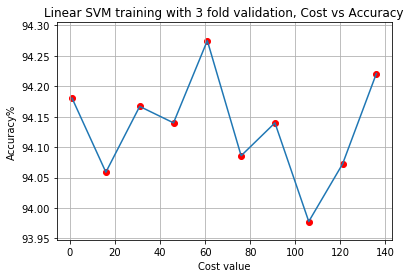

In [69]:
plt.scatter(cost,lin_accuracy, color='r')
plt.plot(cost,lin_accuracy)
plt.grid(True)
plt.title("Linear SVM training with 3 fold validation, Cost vs Accuracy")
plt.xlabel("Cost value")
plt.ylabel("Accuracy%")
plt.show()

The  best value for C that I found using the 3fold cross validation is for C =61

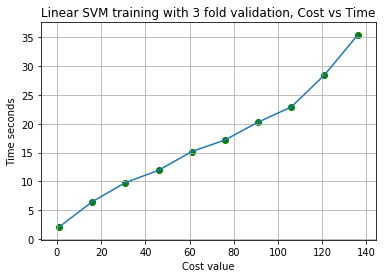

[2.098, 6.492, 9.803, 11.926, 15.188, 17.187, 20.283, 22.913, 28.455, 35.372]


In [74]:
plt.plot(cost,lin_timed)
plt.scatter(cost,lin_timed, color='g')
plt.grid(True)
plt.title("Linear SVM training with 3 fold validation, Cost vs Time")
plt.xlabel("Cost value")
plt.ylabel("Time seconds")
plt.show()
print lin_timed

Now lets try our model on the prediction:

In [53]:
m = svm_train(prob, '-t 0 -c 61 -n 3')

In [54]:
svm_save_model('linear.model',m)
m = svm_load_model('linear.model')
p_label, p_acc, p_val = svm_predict(ytest, xtest, m)

Accuracy = 93.2036% (3401/3649) (classification)


The $\boldsymbol{Accuracy}$ for the testing set is $\boldsymbol{93.203\%}$ when using
the 3-fold cross validation on our data set. By using a set value of C to be 
61, I found that this accuracy for the svm was a good one for prediciting the correct
values of the test cases.

# Kernel SVM in LIBSVM.

In this section I will experiment with different types of kernels which are the Polynomial kernel and the RBF kernel. I will also be switching the parameters to find the ideal parameters for the data: 


The first kernel I will try is the polynomial kernel of degree 2.

In [23]:
c = 1
poly2_accuracy = []
poly2_timed = []
for i in range(10):
    t0 = time()
    a = "-t 1 -v 3 -d 2 -c " + str(c)
    param = svm_parameter(a)
    m = svm_train(prob, param)
    poly2_accuracy.append(m)
    tp = time()
    poly2_timed.append(round(tp-t0,3))
    c +=25

Cross Validation Accuracy = 94.5855%
Cross Validation Accuracy = 95.7737%
Cross Validation Accuracy = 95.6117%
Cross Validation Accuracy = 95.5442%
Cross Validation Accuracy = 95.3956%
Cross Validation Accuracy = 95.5982%
Cross Validation Accuracy = 95.0716%
Cross Validation Accuracy = 95.6252%
Cross Validation Accuracy = 95.7602%
Cross Validation Accuracy = 95.2336%


Now I will try training my data with the polynomial kernel of degree 3. 

In [24]:
c = 1
poly3_accuracy = []
poly3_timed = []
for i in range(10):
    t0 = time()
    a = "-t 1 -v 3 -d 3 -c " + str(c)
    param = svm_parameter(a)
    m = svm_train(prob, param)
    poly3_accuracy.append(m)
    tp = time()
    poly3_timed.append(round(tp-t0,3))
    c +=25

Cross Validation Accuracy = 94.842%
Cross Validation Accuracy = 96.0708%
Cross Validation Accuracy = 96.0573%
Cross Validation Accuracy = 96.2463%
Cross Validation Accuracy = 95.8682%
Cross Validation Accuracy = 95.5847%
Cross Validation Accuracy = 95.7602%
Cross Validation Accuracy = 96.0032%
Cross Validation Accuracy = 95.7467%
Cross Validation Accuracy = 95.4361%


This last run is for the Radia Based Function Kernel. 


In [25]:
c = 1
rbf_accuracy = []
rbf_timed = []
for i in range(10):
    t0 = time()
    a = "-t 2 -v 3 -c " + str(c)
    param = svm_parameter(a)
    m = svm_train(prob, param)
    rbf_accuracy.append(m)
    tp = time()
    rbf_timed.append(round(tp-t0,3))
    c +=25

Cross Validation Accuracy = 95.0851%
Cross Validation Accuracy = 96.1113%
Cross Validation Accuracy = 96.2868%
Cross Validation Accuracy = 95.9087%
Cross Validation Accuracy = 96.2193%
Cross Validation Accuracy = 96.1653%
Cross Validation Accuracy = 95.7197%
Cross Validation Accuracy = 96.2193%
Cross Validation Accuracy = 95.7602%
Cross Validation Accuracy = 95.7197%


It seems to be that the $\boldsymbol{RBF}$ kernel performs better than the linear or the polynomail functions.